In [1]:
# 산모 건강 위험 데이터
# 딥러닝으로 산모의 위험도 예측 

In [2]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [3]:
data = pd.read_csv('./data/Maternal Health Risk Data Set.csv')

In [4]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
data['RiskLevel']=np.where(data['RiskLevel']=='high risk', 2, np.where(data['RiskLevel']=='mid risk', 1, 0).astype('int')).astype('int')

In [7]:
data['RiskLevel']

0       2
1       2
2       2
3       2
4       0
       ..
1009    2
1010    2
1011    2
1012    2
1013    1
Name: RiskLevel, Length: 1014, dtype: int32

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 51.6 KB


In [9]:
data.loc[:,:'HeartRate']

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [10]:
X_data=data.loc[:,:'HeartRate']

In [11]:
y_data=data['RiskLevel']

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_data=to_categorical(y_data) 

In [14]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [15]:
X_data[:3]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80


In [16]:
X_data.shape, y_data.shape

((1014, 6), (1014, 3))

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(811, 6) (811, 3)
(203, 6) (203, 3)


In [20]:
# 모델생성
# 심층 신경망 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=6))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [22]:
# 이 모델로 설정을 하겠음(compile)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc','mae'])

In [23]:
# 설정한 레이어들을 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              7168      
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                3

In [24]:
history = model.fit(X_train, y_train, batch_size=30, epochs=2000, verbose=2)
history

Epoch 1/2000
28/28 - 1s - loss: 1.0099 - acc: 0.4969 - mae: 0.4141 - 592ms/epoch - 21ms/step
Epoch 2/2000
28/28 - 0s - loss: 0.9535 - acc: 0.5388 - mae: 0.3775 - 99ms/epoch - 4ms/step
Epoch 3/2000
28/28 - 0s - loss: 0.8319 - acc: 0.5795 - mae: 0.3412 - 122ms/epoch - 4ms/step
Epoch 4/2000
28/28 - 0s - loss: 0.8684 - acc: 0.5894 - mae: 0.3473 - 112ms/epoch - 4ms/step
Epoch 5/2000
28/28 - 0s - loss: 0.9389 - acc: 0.5277 - mae: 0.3783 - 118ms/epoch - 4ms/step
Epoch 6/2000
28/28 - 0s - loss: 0.8433 - acc: 0.5561 - mae: 0.3461 - 124ms/epoch - 4ms/step
Epoch 7/2000
28/28 - 0s - loss: 0.7786 - acc: 0.6190 - mae: 0.3267 - 116ms/epoch - 4ms/step
Epoch 8/2000
28/28 - 0s - loss: 0.7551 - acc: 0.6215 - mae: 0.3187 - 108ms/epoch - 4ms/step
Epoch 9/2000
28/28 - 0s - loss: 0.7761 - acc: 0.6350 - mae: 0.3265 - 117ms/epoch - 4ms/step
Epoch 10/2000
28/28 - 0s - loss: 0.7180 - acc: 0.6880 - mae: 0.2873 - 118ms/epoch - 4ms/step
Epoch 11/2000
28/28 - 0s - loss: 0.6964 - acc: 0.6930 - mae: 0.2822 - 110ms/epo

Epoch 90/2000
28/28 - 0s - loss: 0.5041 - acc: 0.7250 - mae: 0.2181 - 109ms/epoch - 4ms/step
Epoch 91/2000
28/28 - 0s - loss: 0.4854 - acc: 0.7583 - mae: 0.2083 - 118ms/epoch - 4ms/step
Epoch 92/2000
28/28 - 0s - loss: 0.4994 - acc: 0.7485 - mae: 0.2177 - 120ms/epoch - 4ms/step
Epoch 93/2000
28/28 - 0s - loss: 0.5097 - acc: 0.7361 - mae: 0.2187 - 116ms/epoch - 4ms/step
Epoch 94/2000
28/28 - 0s - loss: 0.5387 - acc: 0.7213 - mae: 0.2329 - 113ms/epoch - 4ms/step
Epoch 95/2000
28/28 - 0s - loss: 0.4946 - acc: 0.7497 - mae: 0.2170 - 109ms/epoch - 4ms/step
Epoch 96/2000
28/28 - 0s - loss: 0.5088 - acc: 0.7497 - mae: 0.2109 - 111ms/epoch - 4ms/step
Epoch 97/2000
28/28 - 0s - loss: 0.5729 - acc: 0.7189 - mae: 0.2354 - 113ms/epoch - 4ms/step
Epoch 98/2000
28/28 - 0s - loss: 0.4964 - acc: 0.7509 - mae: 0.2157 - 113ms/epoch - 4ms/step
Epoch 99/2000
28/28 - 0s - loss: 0.4792 - acc: 0.7509 - mae: 0.2056 - 109ms/epoch - 4ms/step
Epoch 100/2000
28/28 - 0s - loss: 0.4801 - acc: 0.7337 - mae: 0.2083 -

Epoch 178/2000
28/28 - 0s - loss: 0.3750 - acc: 0.8249 - mae: 0.1639 - 112ms/epoch - 4ms/step
Epoch 179/2000
28/28 - 0s - loss: 0.3916 - acc: 0.8163 - mae: 0.1650 - 109ms/epoch - 4ms/step
Epoch 180/2000
28/28 - 0s - loss: 0.3393 - acc: 0.8533 - mae: 0.1511 - 110ms/epoch - 4ms/step
Epoch 181/2000
28/28 - 0s - loss: 0.4259 - acc: 0.8126 - mae: 0.1589 - 101ms/epoch - 4ms/step
Epoch 182/2000
28/28 - 0s - loss: 0.3524 - acc: 0.8323 - mae: 0.1571 - 118ms/epoch - 4ms/step
Epoch 183/2000
28/28 - 0s - loss: 0.3188 - acc: 0.8520 - mae: 0.1382 - 111ms/epoch - 4ms/step
Epoch 184/2000
28/28 - 0s - loss: 0.3317 - acc: 0.8496 - mae: 0.1412 - 109ms/epoch - 4ms/step
Epoch 185/2000
28/28 - 0s - loss: 0.3117 - acc: 0.8619 - mae: 0.1374 - 106ms/epoch - 4ms/step
Epoch 186/2000
28/28 - 0s - loss: 0.3154 - acc: 0.8557 - mae: 0.1361 - 108ms/epoch - 4ms/step
Epoch 187/2000
28/28 - 0s - loss: 0.3492 - acc: 0.8323 - mae: 0.1402 - 108ms/epoch - 4ms/step
Epoch 188/2000
28/28 - 0s - loss: 0.3123 - acc: 0.8730 - mae

Epoch 266/2000
28/28 - 0s - loss: 0.3486 - acc: 0.8360 - mae: 0.1380 - 109ms/epoch - 4ms/step
Epoch 267/2000
28/28 - 0s - loss: 0.3384 - acc: 0.8533 - mae: 0.1373 - 106ms/epoch - 4ms/step
Epoch 268/2000
28/28 - 0s - loss: 0.2717 - acc: 0.8767 - mae: 0.1221 - 110ms/epoch - 4ms/step
Epoch 269/2000
28/28 - 0s - loss: 0.2743 - acc: 0.8705 - mae: 0.1146 - 108ms/epoch - 4ms/step
Epoch 270/2000
28/28 - 0s - loss: 0.2406 - acc: 0.8903 - mae: 0.1053 - 110ms/epoch - 4ms/step
Epoch 271/2000
28/28 - 0s - loss: 0.2477 - acc: 0.8779 - mae: 0.1027 - 110ms/epoch - 4ms/step
Epoch 272/2000
28/28 - 0s - loss: 0.2568 - acc: 0.8767 - mae: 0.1071 - 111ms/epoch - 4ms/step
Epoch 273/2000
28/28 - 0s - loss: 0.2508 - acc: 0.8878 - mae: 0.1044 - 111ms/epoch - 4ms/step
Epoch 274/2000
28/28 - 0s - loss: 0.2534 - acc: 0.8816 - mae: 0.1054 - 110ms/epoch - 4ms/step
Epoch 275/2000
28/28 - 0s - loss: 0.3188 - acc: 0.8397 - mae: 0.1281 - 107ms/epoch - 4ms/step
Epoch 276/2000
28/28 - 0s - loss: 0.2496 - acc: 0.8742 - mae

Epoch 354/2000
28/28 - 0s - loss: 0.2148 - acc: 0.8952 - mae: 0.0946 - 112ms/epoch - 4ms/step
Epoch 355/2000
28/28 - 0s - loss: 0.2039 - acc: 0.8977 - mae: 0.0908 - 108ms/epoch - 4ms/step
Epoch 356/2000
28/28 - 0s - loss: 0.2196 - acc: 0.8977 - mae: 0.0925 - 107ms/epoch - 4ms/step
Epoch 357/2000
28/28 - 0s - loss: 0.2154 - acc: 0.8977 - mae: 0.0947 - 109ms/epoch - 4ms/step
Epoch 358/2000
28/28 - 0s - loss: 0.2005 - acc: 0.8952 - mae: 0.0877 - 108ms/epoch - 4ms/step
Epoch 359/2000
28/28 - 0s - loss: 0.2141 - acc: 0.8977 - mae: 0.0945 - 109ms/epoch - 4ms/step
Epoch 360/2000
28/28 - 0s - loss: 0.2521 - acc: 0.8878 - mae: 0.0963 - 108ms/epoch - 4ms/step
Epoch 361/2000
28/28 - 0s - loss: 0.2527 - acc: 0.8755 - mae: 0.1033 - 109ms/epoch - 4ms/step
Epoch 362/2000
28/28 - 0s - loss: 0.2726 - acc: 0.8656 - mae: 0.1139 - 109ms/epoch - 4ms/step
Epoch 363/2000
28/28 - 0s - loss: 0.3839 - acc: 0.8385 - mae: 0.1387 - 109ms/epoch - 4ms/step
Epoch 364/2000
28/28 - 0s - loss: 0.3052 - acc: 0.8607 - mae

Epoch 442/2000
28/28 - 0s - loss: 0.1847 - acc: 0.9149 - mae: 0.0819 - 110ms/epoch - 4ms/step
Epoch 443/2000
28/28 - 0s - loss: 0.2055 - acc: 0.9014 - mae: 0.0865 - 110ms/epoch - 4ms/step
Epoch 444/2000
28/28 - 0s - loss: 0.2094 - acc: 0.8989 - mae: 0.0879 - 106ms/epoch - 4ms/step
Epoch 445/2000
28/28 - 0s - loss: 0.2043 - acc: 0.9038 - mae: 0.0868 - 112ms/epoch - 4ms/step
Epoch 446/2000
28/28 - 0s - loss: 0.2378 - acc: 0.8903 - mae: 0.0955 - 106ms/epoch - 4ms/step
Epoch 447/2000
28/28 - 0s - loss: 0.2235 - acc: 0.8989 - mae: 0.0954 - 113ms/epoch - 4ms/step
Epoch 448/2000
28/28 - 0s - loss: 0.1960 - acc: 0.9112 - mae: 0.0876 - 102ms/epoch - 4ms/step
Epoch 449/2000
28/28 - 0s - loss: 0.1980 - acc: 0.9014 - mae: 0.0852 - 119ms/epoch - 4ms/step
Epoch 450/2000
28/28 - 0s - loss: 0.2152 - acc: 0.8952 - mae: 0.0892 - 107ms/epoch - 4ms/step
Epoch 451/2000
28/28 - 0s - loss: 0.2165 - acc: 0.9001 - mae: 0.0931 - 108ms/epoch - 4ms/step
Epoch 452/2000
28/28 - 0s - loss: 0.2111 - acc: 0.8878 - mae

Epoch 530/2000
28/28 - 0s - loss: 0.3378 - acc: 0.8434 - mae: 0.1428 - 110ms/epoch - 4ms/step
Epoch 531/2000
28/28 - 0s - loss: 0.3333 - acc: 0.8730 - mae: 0.1268 - 110ms/epoch - 4ms/step
Epoch 532/2000
28/28 - 0s - loss: 0.2344 - acc: 0.8829 - mae: 0.1065 - 109ms/epoch - 4ms/step
Epoch 533/2000
28/28 - 0s - loss: 0.2363 - acc: 0.8989 - mae: 0.0988 - 110ms/epoch - 4ms/step
Epoch 534/2000
28/28 - 0s - loss: 0.2009 - acc: 0.9051 - mae: 0.0894 - 109ms/epoch - 4ms/step
Epoch 535/2000
28/28 - 0s - loss: 0.2045 - acc: 0.9014 - mae: 0.0888 - 113ms/epoch - 4ms/step
Epoch 536/2000
28/28 - 0s - loss: 0.1986 - acc: 0.8989 - mae: 0.0881 - 108ms/epoch - 4ms/step
Epoch 537/2000
28/28 - 0s - loss: 0.1984 - acc: 0.8989 - mae: 0.0880 - 108ms/epoch - 4ms/step
Epoch 538/2000
28/28 - 0s - loss: 0.2115 - acc: 0.9014 - mae: 0.0884 - 108ms/epoch - 4ms/step
Epoch 539/2000
28/28 - 0s - loss: 0.3067 - acc: 0.8668 - mae: 0.1172 - 108ms/epoch - 4ms/step
Epoch 540/2000
28/28 - 0s - loss: 0.2270 - acc: 0.8964 - mae

Epoch 618/2000
28/28 - 0s - loss: 0.1907 - acc: 0.9088 - mae: 0.0841 - 112ms/epoch - 4ms/step
Epoch 619/2000
28/28 - 0s - loss: 0.5199 - acc: 0.8138 - mae: 0.1514 - 111ms/epoch - 4ms/step
Epoch 620/2000
28/28 - 0s - loss: 0.3232 - acc: 0.8570 - mae: 0.1366 - 113ms/epoch - 4ms/step
Epoch 621/2000
28/28 - 0s - loss: 0.2720 - acc: 0.8829 - mae: 0.1163 - 111ms/epoch - 4ms/step
Epoch 622/2000
28/28 - 0s - loss: 0.2264 - acc: 0.9014 - mae: 0.1033 - 108ms/epoch - 4ms/step
Epoch 623/2000
28/28 - 0s - loss: 0.3757 - acc: 0.8483 - mae: 0.1410 - 107ms/epoch - 4ms/step
Epoch 624/2000
28/28 - 0s - loss: 0.2879 - acc: 0.8705 - mae: 0.1264 - 112ms/epoch - 4ms/step
Epoch 625/2000
28/28 - 0s - loss: 0.2607 - acc: 0.8829 - mae: 0.1140 - 114ms/epoch - 4ms/step
Epoch 626/2000
28/28 - 0s - loss: 0.2534 - acc: 0.8841 - mae: 0.1080 - 113ms/epoch - 4ms/step
Epoch 627/2000
28/28 - 0s - loss: 0.2291 - acc: 0.8927 - mae: 0.1009 - 110ms/epoch - 4ms/step
Epoch 628/2000
28/28 - 0s - loss: 0.2277 - acc: 0.8890 - mae

Epoch 706/2000
28/28 - 0s - loss: 0.1904 - acc: 0.9038 - mae: 0.0826 - 110ms/epoch - 4ms/step
Epoch 707/2000
28/28 - 0s - loss: 0.1916 - acc: 0.9088 - mae: 0.0825 - 109ms/epoch - 4ms/step
Epoch 708/2000
28/28 - 0s - loss: 0.1873 - acc: 0.9075 - mae: 0.0815 - 108ms/epoch - 4ms/step
Epoch 709/2000
28/28 - 0s - loss: 0.1821 - acc: 0.9125 - mae: 0.0806 - 109ms/epoch - 4ms/step
Epoch 710/2000
28/28 - 0s - loss: 0.1980 - acc: 0.9038 - mae: 0.0849 - 101ms/epoch - 4ms/step
Epoch 711/2000
28/28 - 0s - loss: 0.1827 - acc: 0.9075 - mae: 0.0822 - 119ms/epoch - 4ms/step
Epoch 712/2000
28/28 - 0s - loss: 0.1833 - acc: 0.9075 - mae: 0.0815 - 109ms/epoch - 4ms/step
Epoch 713/2000
28/28 - 0s - loss: 0.1782 - acc: 0.9075 - mae: 0.0801 - 109ms/epoch - 4ms/step
Epoch 714/2000
28/28 - 0s - loss: 0.1786 - acc: 0.9112 - mae: 0.0784 - 111ms/epoch - 4ms/step
Epoch 715/2000
28/28 - 0s - loss: 0.1715 - acc: 0.9186 - mae: 0.0772 - 127ms/epoch - 5ms/step
Epoch 716/2000
28/28 - 0s - loss: 0.1818 - acc: 0.9051 - mae

Epoch 794/2000
28/28 - 0s - loss: 0.2094 - acc: 0.9100 - mae: 0.0904 - 112ms/epoch - 4ms/step
Epoch 795/2000
28/28 - 0s - loss: 0.2052 - acc: 0.8989 - mae: 0.0899 - 111ms/epoch - 4ms/step
Epoch 796/2000
28/28 - 0s - loss: 0.1991 - acc: 0.9026 - mae: 0.0892 - 107ms/epoch - 4ms/step
Epoch 797/2000
28/28 - 0s - loss: 0.1980 - acc: 0.9088 - mae: 0.0849 - 114ms/epoch - 4ms/step
Epoch 798/2000
28/28 - 0s - loss: 0.1978 - acc: 0.9014 - mae: 0.0879 - 106ms/epoch - 4ms/step
Epoch 799/2000
28/28 - 0s - loss: 0.2110 - acc: 0.9001 - mae: 0.0881 - 109ms/epoch - 4ms/step
Epoch 800/2000
28/28 - 0s - loss: 0.2045 - acc: 0.9014 - mae: 0.0871 - 114ms/epoch - 4ms/step
Epoch 801/2000
28/28 - 0s - loss: 0.2224 - acc: 0.8927 - mae: 0.0918 - 110ms/epoch - 4ms/step
Epoch 802/2000
28/28 - 0s - loss: 0.1946 - acc: 0.9088 - mae: 0.0848 - 122ms/epoch - 4ms/step
Epoch 803/2000
28/28 - 0s - loss: 0.1974 - acc: 0.9038 - mae: 0.0838 - 117ms/epoch - 4ms/step
Epoch 804/2000
28/28 - 0s - loss: 0.2173 - acc: 0.8964 - mae

Epoch 882/2000
28/28 - 0s - loss: 0.1810 - acc: 0.9162 - mae: 0.0793 - 110ms/epoch - 4ms/step
Epoch 883/2000
28/28 - 0s - loss: 0.1779 - acc: 0.9137 - mae: 0.0769 - 111ms/epoch - 4ms/step
Epoch 884/2000
28/28 - 0s - loss: 0.2605 - acc: 0.9026 - mae: 0.0888 - 110ms/epoch - 4ms/step
Epoch 885/2000
28/28 - 0s - loss: 0.2855 - acc: 0.8841 - mae: 0.1044 - 109ms/epoch - 4ms/step
Epoch 886/2000
28/28 - 0s - loss: 0.2767 - acc: 0.8792 - mae: 0.1106 - 108ms/epoch - 4ms/step
Epoch 887/2000
28/28 - 0s - loss: 0.2488 - acc: 0.8903 - mae: 0.1037 - 109ms/epoch - 4ms/step
Epoch 888/2000
28/28 - 0s - loss: 0.1967 - acc: 0.9088 - mae: 0.0881 - 111ms/epoch - 4ms/step
Epoch 889/2000
28/28 - 0s - loss: 0.2001 - acc: 0.9038 - mae: 0.0828 - 108ms/epoch - 4ms/step
Epoch 890/2000
28/28 - 0s - loss: 0.1971 - acc: 0.9063 - mae: 0.0854 - 109ms/epoch - 4ms/step
Epoch 891/2000
28/28 - 0s - loss: 0.2126 - acc: 0.9014 - mae: 0.0863 - 103ms/epoch - 4ms/step
Epoch 892/2000
28/28 - 0s - loss: 0.1909 - acc: 0.9100 - mae

28/28 - 0s - loss: 0.2217 - acc: 0.8952 - mae: 0.0905 - 109ms/epoch - 4ms/step
Epoch 970/2000
28/28 - 0s - loss: 0.1908 - acc: 0.9075 - mae: 0.0843 - 109ms/epoch - 4ms/step
Epoch 971/2000
28/28 - 0s - loss: 0.1652 - acc: 0.9199 - mae: 0.0749 - 91ms/epoch - 3ms/step
Epoch 972/2000
28/28 - 0s - loss: 0.1642 - acc: 0.9174 - mae: 0.0723 - 112ms/epoch - 4ms/step
Epoch 973/2000
28/28 - 0s - loss: 0.1695 - acc: 0.9199 - mae: 0.0729 - 113ms/epoch - 4ms/step
Epoch 974/2000
28/28 - 0s - loss: 0.2334 - acc: 0.8866 - mae: 0.0909 - 110ms/epoch - 4ms/step
Epoch 975/2000
28/28 - 0s - loss: 0.2014 - acc: 0.9088 - mae: 0.0837 - 99ms/epoch - 4ms/step
Epoch 976/2000
28/28 - 0s - loss: 0.1963 - acc: 0.9186 - mae: 0.0795 - 118ms/epoch - 4ms/step
Epoch 977/2000
28/28 - 0s - loss: 0.2367 - acc: 0.8890 - mae: 0.0951 - 109ms/epoch - 4ms/step
Epoch 978/2000
28/28 - 0s - loss: 0.2460 - acc: 0.8977 - mae: 0.0952 - 109ms/epoch - 4ms/step
Epoch 979/2000
28/28 - 0s - loss: 0.2186 - acc: 0.8940 - mae: 0.0929 - 106ms/

Epoch 1056/2000
28/28 - 0s - loss: 0.2114 - acc: 0.9014 - mae: 0.0873 - 109ms/epoch - 4ms/step
Epoch 1057/2000
28/28 - 0s - loss: 0.1957 - acc: 0.9038 - mae: 0.0855 - 108ms/epoch - 4ms/step
Epoch 1058/2000
28/28 - 0s - loss: 0.2044 - acc: 0.8964 - mae: 0.0859 - 109ms/epoch - 4ms/step
Epoch 1059/2000
28/28 - 0s - loss: 0.2078 - acc: 0.9051 - mae: 0.0871 - 109ms/epoch - 4ms/step
Epoch 1060/2000
28/28 - 0s - loss: 0.2242 - acc: 0.8964 - mae: 0.0891 - 108ms/epoch - 4ms/step
Epoch 1061/2000
28/28 - 0s - loss: 0.1940 - acc: 0.9026 - mae: 0.0867 - 112ms/epoch - 4ms/step
Epoch 1062/2000
28/28 - 0s - loss: 0.1730 - acc: 0.9236 - mae: 0.0809 - 112ms/epoch - 4ms/step
Epoch 1063/2000
28/28 - 0s - loss: 0.1613 - acc: 0.9273 - mae: 0.0748 - 112ms/epoch - 4ms/step
Epoch 1064/2000
28/28 - 0s - loss: 0.1558 - acc: 0.9248 - mae: 0.0715 - 107ms/epoch - 4ms/step
Epoch 1065/2000
28/28 - 0s - loss: 0.1557 - acc: 0.9260 - mae: 0.0707 - 109ms/epoch - 4ms/step
Epoch 1066/2000
28/28 - 0s - loss: 0.1695 - acc: 0

Epoch 1143/2000
28/28 - 0s - loss: 0.2932 - acc: 0.8804 - mae: 0.1016 - 118ms/epoch - 4ms/step
Epoch 1144/2000
28/28 - 0s - loss: 0.2664 - acc: 0.8742 - mae: 0.1063 - 117ms/epoch - 4ms/step
Epoch 1145/2000
28/28 - 0s - loss: 0.1946 - acc: 0.9075 - mae: 0.0858 - 118ms/epoch - 4ms/step
Epoch 1146/2000
28/28 - 0s - loss: 0.1824 - acc: 0.9112 - mae: 0.0800 - 115ms/epoch - 4ms/step
Epoch 1147/2000
28/28 - 0s - loss: 0.1760 - acc: 0.9137 - mae: 0.0778 - 115ms/epoch - 4ms/step
Epoch 1148/2000
28/28 - 0s - loss: 0.1849 - acc: 0.9038 - mae: 0.0812 - 114ms/epoch - 4ms/step
Epoch 1149/2000
28/28 - 0s - loss: 0.1884 - acc: 0.9014 - mae: 0.0814 - 119ms/epoch - 4ms/step
Epoch 1150/2000
28/28 - 0s - loss: 0.1819 - acc: 0.9100 - mae: 0.0782 - 118ms/epoch - 4ms/step
Epoch 1151/2000
28/28 - 0s - loss: 0.1804 - acc: 0.9174 - mae: 0.0785 - 116ms/epoch - 4ms/step
Epoch 1152/2000
28/28 - 0s - loss: 0.1713 - acc: 0.9162 - mae: 0.0761 - 118ms/epoch - 4ms/step
Epoch 1153/2000
28/28 - 0s - loss: 0.1813 - acc: 0

Epoch 1230/2000
28/28 - 0s - loss: 0.1685 - acc: 0.9149 - mae: 0.0764 - 115ms/epoch - 4ms/step
Epoch 1231/2000
28/28 - 0s - loss: 0.1617 - acc: 0.9174 - mae: 0.0733 - 116ms/epoch - 4ms/step
Epoch 1232/2000
28/28 - 0s - loss: 0.1555 - acc: 0.9260 - mae: 0.0705 - 117ms/epoch - 4ms/step
Epoch 1233/2000
28/28 - 0s - loss: 0.1588 - acc: 0.9186 - mae: 0.0691 - 116ms/epoch - 4ms/step
Epoch 1234/2000
28/28 - 0s - loss: 0.3865 - acc: 0.8335 - mae: 0.1275 - 117ms/epoch - 4ms/step
Epoch 1235/2000
28/28 - 0s - loss: 0.2466 - acc: 0.8829 - mae: 0.1125 - 120ms/epoch - 4ms/step
Epoch 1236/2000
28/28 - 0s - loss: 0.2357 - acc: 0.8890 - mae: 0.1016 - 119ms/epoch - 4ms/step
Epoch 1237/2000
28/28 - 0s - loss: 0.2661 - acc: 0.8792 - mae: 0.1085 - 114ms/epoch - 4ms/step
Epoch 1238/2000
28/28 - 0s - loss: 0.2153 - acc: 0.8964 - mae: 0.0980 - 115ms/epoch - 4ms/step
Epoch 1239/2000
28/28 - 0s - loss: 0.1879 - acc: 0.9174 - mae: 0.0872 - 115ms/epoch - 4ms/step
Epoch 1240/2000
28/28 - 0s - loss: 0.1777 - acc: 0

Epoch 1317/2000
28/28 - 0s - loss: 0.1814 - acc: 0.9137 - mae: 0.0814 - 115ms/epoch - 4ms/step
Epoch 1318/2000
28/28 - 0s - loss: 0.5643 - acc: 0.7928 - mae: 0.1563 - 116ms/epoch - 4ms/step
Epoch 1319/2000
28/28 - 0s - loss: 0.3090 - acc: 0.8656 - mae: 0.1346 - 117ms/epoch - 4ms/step
Epoch 1320/2000
28/28 - 0s - loss: 0.2397 - acc: 0.8866 - mae: 0.1092 - 120ms/epoch - 4ms/step
Epoch 1321/2000
28/28 - 0s - loss: 0.2090 - acc: 0.9014 - mae: 0.0959 - 116ms/epoch - 4ms/step
Epoch 1322/2000
28/28 - 0s - loss: 0.1929 - acc: 0.9125 - mae: 0.0859 - 114ms/epoch - 4ms/step
Epoch 1323/2000
28/28 - 0s - loss: 0.1960 - acc: 0.9100 - mae: 0.0871 - 115ms/epoch - 4ms/step
Epoch 1324/2000
28/28 - 0s - loss: 0.1976 - acc: 0.9051 - mae: 0.0872 - 115ms/epoch - 4ms/step
Epoch 1325/2000
28/28 - 0s - loss: 0.1885 - acc: 0.9075 - mae: 0.0835 - 114ms/epoch - 4ms/step
Epoch 1326/2000
28/28 - 0s - loss: 0.1722 - acc: 0.9199 - mae: 0.0773 - 116ms/epoch - 4ms/step
Epoch 1327/2000
28/28 - 0s - loss: 0.1716 - acc: 0

Epoch 1404/2000
28/28 - 0s - loss: 0.1806 - acc: 0.9137 - mae: 0.0754 - 116ms/epoch - 4ms/step
Epoch 1405/2000
28/28 - 0s - loss: 0.4592 - acc: 0.8496 - mae: 0.1231 - 118ms/epoch - 4ms/step
Epoch 1406/2000
28/28 - 0s - loss: 0.2678 - acc: 0.8829 - mae: 0.1136 - 116ms/epoch - 4ms/step
Epoch 1407/2000
28/28 - 0s - loss: 0.1840 - acc: 0.9186 - mae: 0.0860 - 115ms/epoch - 4ms/step
Epoch 1408/2000
28/28 - 0s - loss: 0.1812 - acc: 0.9199 - mae: 0.0798 - 115ms/epoch - 4ms/step
Epoch 1409/2000
28/28 - 0s - loss: 0.1833 - acc: 0.9174 - mae: 0.0782 - 117ms/epoch - 4ms/step
Epoch 1410/2000
28/28 - 0s - loss: 0.1661 - acc: 0.9186 - mae: 0.0751 - 118ms/epoch - 4ms/step
Epoch 1411/2000
28/28 - 0s - loss: 0.1615 - acc: 0.9211 - mae: 0.0724 - 116ms/epoch - 4ms/step
Epoch 1412/2000
28/28 - 0s - loss: 0.1722 - acc: 0.9186 - mae: 0.0740 - 117ms/epoch - 4ms/step
Epoch 1413/2000
28/28 - 0s - loss: 0.1763 - acc: 0.9112 - mae: 0.0757 - 118ms/epoch - 4ms/step
Epoch 1414/2000
28/28 - 0s - loss: 0.1821 - acc: 0

Epoch 1491/2000
28/28 - 0s - loss: 0.2275 - acc: 0.8977 - mae: 0.0861 - 116ms/epoch - 4ms/step
Epoch 1492/2000
28/28 - 0s - loss: 0.2073 - acc: 0.8977 - mae: 0.0895 - 117ms/epoch - 4ms/step
Epoch 1493/2000
28/28 - 0s - loss: 0.1907 - acc: 0.9088 - mae: 0.0855 - 115ms/epoch - 4ms/step
Epoch 1494/2000
28/28 - 0s - loss: 0.1641 - acc: 0.9211 - mae: 0.0753 - 115ms/epoch - 4ms/step
Epoch 1495/2000
28/28 - 0s - loss: 0.1776 - acc: 0.9112 - mae: 0.0769 - 115ms/epoch - 4ms/step
Epoch 1496/2000
28/28 - 0s - loss: 0.1733 - acc: 0.9125 - mae: 0.0769 - 116ms/epoch - 4ms/step
Epoch 1497/2000
28/28 - 0s - loss: 0.2009 - acc: 0.9038 - mae: 0.0804 - 117ms/epoch - 4ms/step
Epoch 1498/2000
28/28 - 0s - loss: 0.1796 - acc: 0.9100 - mae: 0.0793 - 117ms/epoch - 4ms/step
Epoch 1499/2000
28/28 - 0s - loss: 0.2016 - acc: 0.9063 - mae: 0.0800 - 120ms/epoch - 4ms/step
Epoch 1500/2000
28/28 - 0s - loss: 0.1644 - acc: 0.9211 - mae: 0.0731 - 115ms/epoch - 4ms/step
Epoch 1501/2000
28/28 - 0s - loss: 0.1618 - acc: 0

Epoch 1578/2000
28/28 - 0s - loss: 0.2148 - acc: 0.8989 - mae: 0.0875 - 116ms/epoch - 4ms/step
Epoch 1579/2000
28/28 - 0s - loss: 0.2124 - acc: 0.9112 - mae: 0.0846 - 117ms/epoch - 4ms/step
Epoch 1580/2000
28/28 - 0s - loss: 0.2601 - acc: 0.8890 - mae: 0.0914 - 115ms/epoch - 4ms/step
Epoch 1581/2000
28/28 - 0s - loss: 0.2742 - acc: 0.8681 - mae: 0.1066 - 117ms/epoch - 4ms/step
Epoch 1582/2000
28/28 - 0s - loss: 0.2060 - acc: 0.9026 - mae: 0.0928 - 118ms/epoch - 4ms/step
Epoch 1583/2000
28/28 - 0s - loss: 0.1905 - acc: 0.9075 - mae: 0.0844 - 119ms/epoch - 4ms/step
Epoch 1584/2000
28/28 - 0s - loss: 0.1811 - acc: 0.9088 - mae: 0.0801 - 115ms/epoch - 4ms/step
Epoch 1585/2000
28/28 - 0s - loss: 0.2027 - acc: 0.9038 - mae: 0.0863 - 114ms/epoch - 4ms/step
Epoch 1586/2000
28/28 - 0s - loss: 0.3014 - acc: 0.8829 - mae: 0.1035 - 117ms/epoch - 4ms/step
Epoch 1587/2000
28/28 - 0s - loss: 0.2933 - acc: 0.8755 - mae: 0.1099 - 114ms/epoch - 4ms/step
Epoch 1588/2000
28/28 - 0s - loss: 0.2739 - acc: 0

Epoch 1665/2000
28/28 - 0s - loss: 0.2036 - acc: 0.9051 - mae: 0.0835 - 117ms/epoch - 4ms/step
Epoch 1666/2000
28/28 - 0s - loss: 0.2040 - acc: 0.9001 - mae: 0.0874 - 118ms/epoch - 4ms/step
Epoch 1667/2000
28/28 - 0s - loss: 0.1908 - acc: 0.9100 - mae: 0.0836 - 118ms/epoch - 4ms/step
Epoch 1668/2000
28/28 - 0s - loss: 0.1789 - acc: 0.9075 - mae: 0.0813 - 117ms/epoch - 4ms/step
Epoch 1669/2000
28/28 - 0s - loss: 0.1800 - acc: 0.9112 - mae: 0.0787 - 115ms/epoch - 4ms/step
Epoch 1670/2000
28/28 - 0s - loss: 0.1712 - acc: 0.9186 - mae: 0.0756 - 116ms/epoch - 4ms/step
Epoch 1671/2000
28/28 - 0s - loss: 0.1735 - acc: 0.9149 - mae: 0.0765 - 115ms/epoch - 4ms/step
Epoch 1672/2000
28/28 - 0s - loss: 0.1654 - acc: 0.9199 - mae: 0.0732 - 116ms/epoch - 4ms/step
Epoch 1673/2000
28/28 - 0s - loss: 0.1565 - acc: 0.9236 - mae: 0.0688 - 116ms/epoch - 4ms/step
Epoch 1674/2000
28/28 - 0s - loss: 0.1593 - acc: 0.9186 - mae: 0.0695 - 116ms/epoch - 4ms/step
Epoch 1675/2000
28/28 - 0s - loss: 0.1659 - acc: 0

Epoch 1752/2000
28/28 - 0s - loss: 0.1699 - acc: 0.9174 - mae: 0.0745 - 119ms/epoch - 4ms/step
Epoch 1753/2000
28/28 - 0s - loss: 0.1583 - acc: 0.9248 - mae: 0.0703 - 114ms/epoch - 4ms/step
Epoch 1754/2000
28/28 - 0s - loss: 0.1595 - acc: 0.9199 - mae: 0.0706 - 113ms/epoch - 4ms/step
Epoch 1755/2000
28/28 - 0s - loss: 0.2022 - acc: 0.9211 - mae: 0.0706 - 115ms/epoch - 4ms/step
Epoch 1756/2000
28/28 - 0s - loss: 0.1760 - acc: 0.9199 - mae: 0.0784 - 116ms/epoch - 4ms/step
Epoch 1757/2000
28/28 - 0s - loss: 0.1668 - acc: 0.9211 - mae: 0.0745 - 116ms/epoch - 4ms/step
Epoch 1758/2000
28/28 - 0s - loss: 0.1562 - acc: 0.9211 - mae: 0.0703 - 117ms/epoch - 4ms/step
Epoch 1759/2000
28/28 - 0s - loss: 0.1726 - acc: 0.9199 - mae: 0.0739 - 122ms/epoch - 4ms/step
Epoch 1760/2000
28/28 - 0s - loss: 0.1801 - acc: 0.9125 - mae: 0.0745 - 118ms/epoch - 4ms/step
Epoch 1761/2000
28/28 - 0s - loss: 0.1804 - acc: 0.9149 - mae: 0.0776 - 114ms/epoch - 4ms/step
Epoch 1762/2000
28/28 - 0s - loss: 0.1837 - acc: 0

Epoch 1839/2000
28/28 - 0s - loss: 0.1578 - acc: 0.9273 - mae: 0.0723 - 118ms/epoch - 4ms/step
Epoch 1840/2000
28/28 - 0s - loss: 0.1599 - acc: 0.9285 - mae: 0.0707 - 117ms/epoch - 4ms/step
Epoch 1841/2000
28/28 - 0s - loss: 0.1618 - acc: 0.9223 - mae: 0.0712 - 117ms/epoch - 4ms/step
Epoch 1842/2000
28/28 - 0s - loss: 0.1581 - acc: 0.9236 - mae: 0.0707 - 118ms/epoch - 4ms/step
Epoch 1843/2000
28/28 - 0s - loss: 0.1560 - acc: 0.9260 - mae: 0.0689 - 142ms/epoch - 5ms/step
Epoch 1844/2000
28/28 - 0s - loss: 0.2089 - acc: 0.9038 - mae: 0.0794 - 158ms/epoch - 6ms/step
Epoch 1845/2000
28/28 - 0s - loss: 0.1917 - acc: 0.9063 - mae: 0.0784 - 142ms/epoch - 5ms/step
Epoch 1846/2000
28/28 - 0s - loss: 0.1796 - acc: 0.9051 - mae: 0.0793 - 139ms/epoch - 5ms/step
Epoch 1847/2000
28/28 - 0s - loss: 0.1634 - acc: 0.9248 - mae: 0.0729 - 124ms/epoch - 4ms/step
Epoch 1848/2000
28/28 - 0s - loss: 0.1674 - acc: 0.9248 - mae: 0.0730 - 119ms/epoch - 4ms/step
Epoch 1849/2000
28/28 - 0s - loss: 0.1535 - acc: 0

Epoch 1926/2000
28/28 - 0s - loss: 0.1629 - acc: 0.9174 - mae: 0.0735 - 119ms/epoch - 4ms/step
Epoch 1927/2000
28/28 - 0s - loss: 0.1535 - acc: 0.9273 - mae: 0.0696 - 118ms/epoch - 4ms/step
Epoch 1928/2000
28/28 - 0s - loss: 0.1503 - acc: 0.9248 - mae: 0.0673 - 118ms/epoch - 4ms/step
Epoch 1929/2000
28/28 - 0s - loss: 0.1582 - acc: 0.9211 - mae: 0.0698 - 117ms/epoch - 4ms/step
Epoch 1930/2000
28/28 - 0s - loss: 0.2124 - acc: 0.9186 - mae: 0.0754 - 117ms/epoch - 4ms/step
Epoch 1931/2000
28/28 - 0s - loss: 0.1661 - acc: 0.9236 - mae: 0.0704 - 118ms/epoch - 4ms/step
Epoch 1932/2000
28/28 - 0s - loss: 0.1523 - acc: 0.9297 - mae: 0.0678 - 117ms/epoch - 4ms/step
Epoch 1933/2000
28/28 - 0s - loss: 0.1468 - acc: 0.9285 - mae: 0.0648 - 115ms/epoch - 4ms/step
Epoch 1934/2000
28/28 - 0s - loss: 0.1457 - acc: 0.9260 - mae: 0.0647 - 117ms/epoch - 4ms/step
Epoch 1935/2000
28/28 - 0s - loss: 0.1481 - acc: 0.9248 - mae: 0.0655 - 120ms/epoch - 4ms/step
Epoch 1936/2000
28/28 - 0s - loss: 0.1459 - acc: 0

In [25]:
test_result=model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.9481 - acc: 0.8374 - mae: 0.1240


In [26]:
# 다중 분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred=model.predict(X_test)

In [27]:
y_pred[0]

array([1.5871630e-38, 3.3113562e-10, 1.0000000e+00], dtype=float32)

In [28]:
y_pred0_index=np.argmax(y_pred[0])

In [29]:
y_pred0_index # predict하여 예측한 각 확률 중 최대값

2

In [30]:
y_test[0] # 실제 위험도는 high risk

array([0., 0., 1.], dtype=float32)

In [31]:
# 예측한 모든 위험도

In [32]:
y_pred_test=np.argmax(y_pred, axis=-1)

In [33]:
y_pred_test

array([2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 1], dtype=int64)

In [34]:
# 실제 위험도

In [35]:
y_test2=np.argmax(y_test, axis=-1)

In [36]:
y_test2

array([2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0,
       2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [38]:
print(accuracy_score(y_test2, y_pred_test))

0.8374384236453202


In [39]:
print(confusion_matrix(y_test2, y_pred_test))

[[67 18  0]
 [ 3 56  6]
 [ 3  3 47]]


In [40]:
# 각 위험군의 test 데이터 적중률 시각화

In [41]:
import matplotlib.pyplot as plt

In [42]:
type(confusion_matrix(y_test2, y_pred_test))

numpy.ndarray

In [43]:
df=pd.DataFrame(confusion_matrix(y_test2, y_pred_test))

In [44]:
df

,0,1,2
0,67,18,0
1,3,56,6
2,3,3,47


In [45]:
df.iloc[1,0]

3

In [53]:
row_risk_score=round(df.iloc[0,0]/(df.iloc[0,0]+df.iloc[1,0]+df.iloc[2,0]), 2)
mid_risk_score=round(df.iloc[1,1]/(df.iloc[0,1]+df.iloc[1,1]+df.iloc[2,1]), 2)
high_risk_score=round(df.iloc[2,2]/(df.iloc[0,2]+df.iloc[1,2]+df.iloc[2,2]), 2)

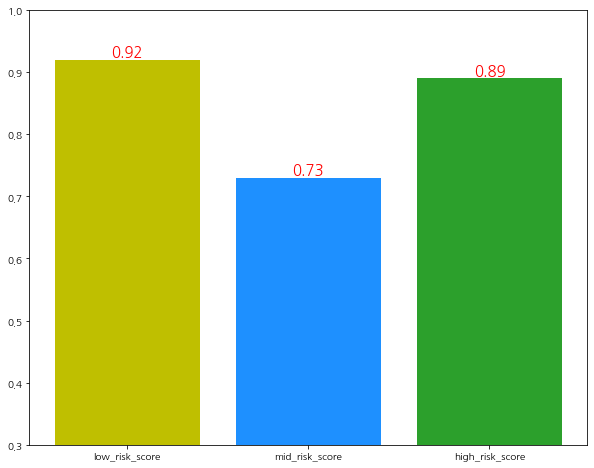

In [54]:
plt.figure(figsize=(10,8))
x = np.arange(3)
risk = ['low_risk_score', 'mid_risk_score', 'high_risk_score']
values = [row_risk_score, mid_risk_score, high_risk_score]
colors = ['y', 'dodgerblue', 'C2']

plt.bar(x, values, color=colors)
plt.xticks(x, risk)
plt.ylim([0.3, 1])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

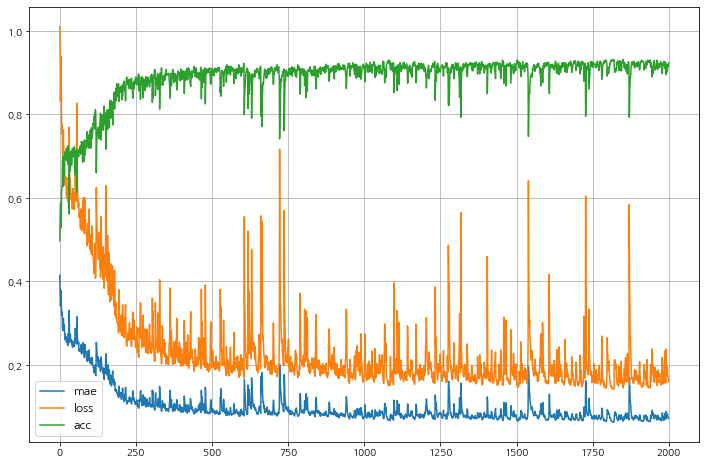

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['mae', 'loss', 'acc'], fontsize=12)
plt.grid()
plt.show()